In [23]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy.io as sio
import seaborn as sns
import statsmodels.api as sm
import funcs as func
import matplotlib.pyplot as plt
import sys
import pdb
import glob
import pickle
import dill

import sys
sys.path.append('/home/jyotika/Utils/hddm/')

import hddm

data_dir = "./Data/Y_maze/Decision_times/"
data_target_dir = "./Data/processed_data/Y_maze/"
figure_dir = "./Figures/Y_maze/"

plt.rcParams["figure.facecolor"] = "w"

In [24]:
all_conflicts = pd.read_csv(data_target_dir+"all_experiments_df_with_DTs.csv")

In [25]:
n_samples = 5000
n_burn = 500

In [26]:
def estimate_regression_model(model_specification, model_name, data, model_objects,
                              n_samples=n_samples, n_burn=n_burn, accuracy_coding=True, convergence_iteration=None):

    if accuracy_coding:
        if "z_" in model_name:
            reg_model = hddm.HDDMRegressor(data=data, models=model_specification, bias=False, group_only_regressors=True, p_outlier=0.05,include='z') # accuracy coded
        else:
            reg_model = hddm.HDDMRegressor(data=data, models=model_specification, bias=False, group_only_regressors=True, p_outlier=0.05) # accuracy coded
        reg_model.find_starting_values()
        reg_model.sample(n_samples, burn=n_burn, dbname=model_name, db='pickle')
#     else:
#         reg_model = hddm.HDDMRegressor(data=data, models=model_specification, bias=True, group_only_regressors=True, p_outlier=0.05) # stim coded
#         reg_model.find_starting_values()
#         reg_model.sample(n_samples, burn=n_burn, dbname=model_name, db='pickle')

    if convergence_iteration is None:
        model_objects[model_name] = reg_model
    else:
        model_objects[model_name + '_' + '_iter' + str(convergence_iteration)] = reg_model

In [27]:
def generate_trialwise_estimates(behavioral_features, av_beta_intercept_df):
    n = len(behavioral_features)
    ind0 = np.where(behavioral_features["response"]==0.0)[0]
    ind1 = np.where(behavioral_features["response"]==1.0)[0]
    
#     v_mean_intercept0 = av_beta_intercept_df.v_Intercept.mean()
#     v_mean_intercept1 = av_beta_intercept_df["v_C(response)[T.1.0]"].mean()
    
    a_mean_intercept0 = av_beta_intercept_df.a_Intercept.mean()
    a_mean_intercept1 = av_beta_intercept_df["a_C(response)[T.1.0]"].mean()
    
    
    #a_mean_intercept = av_beta_intercept_df.a_Intercept.mean()
    
    #rt_mean_beta_response0 = av_beta_intercept_df["v_rt:C(response)[0.0]"].mean()
#     rt_mean_beta = av_beta_intercept_df["v_rt"].mean()
    rt_mean_beta1 = av_beta_intercept_df["a_rt"].mean()
    
    #accuracy_mean_beta = av_beta_intercept_df.v_accuracy.mean()
#     v_jittered_intercept0 = av_beta_intercept_df.v_Intercept.sample(n).reset_index(drop=True)
#     v_jittered_intercept1 = av_beta_intercept_df["v_C(response)[T.1.0]"].sample(n).reset_index(drop=True)
    
    a_jittered_intercept0 = av_beta_intercept_df.a_Intercept.sample(n).reset_index(drop=True)
    a_jittered_intercept1 = av_beta_intercept_df["a_C(response)[T.1.0]"].sample(n).reset_index(drop=True)
    
    
#     rt_jittered_beta_response0 =  av_beta_intercept_df["v_rt:C(response)[0.0]"].sample(n).reset_index(drop=True) 
#     rt_jittered_beta_response1 =  av_beta_intercept_df["v_rt:C(response)[1.0]"].sample(n).reset_index(drop=True) 
#     rt_jittered_beta =  av_beta_intercept_df["v_rt"].sample(n).reset_index(drop=True) 
    rt_jittered_beta1 =  av_beta_intercept_df["a_rt"].sample(n).reset_index(drop=True) 
        
    print("v_jittered_intercept0",v_jittered_intercept0)
    print("rt_jittered_beta",rt_jittered_beta)
    
    
#     print("rt_jittered_beta0",rt_jittered_beta_response0)
#     print("rt_jittered_beta1",rt_jittered_beta_response1)
    
    rt = behavioral_features.rt; #accuracy = behavioral_features.accuracy

    
#     v_trialwise_estimate = [v_mean_intercept0 + rt_mean_beta * np.array(rt)[i] if x ==0 else v_mean_intercept1 + rt_mean_beta * np.array(rt)[i]    for i,x in enumerate(behavioral_features.response)]
    
#     v_trialwise_estimate_jittered = [np.array(v_jittered_intercept0)[i] + np.array(rt_jittered_beta)[i] * np.array(rt)[i] if x == 0 else np.array(v_jittered_intercept1)[i] + np.array(rt_jittered_beta)[i] * np.array(rt)[i]  for i,x in enumerate(behavioral_features.response)]

    a_trialwise_estimate = [a_mean_intercept0 + rt_mean_beta1 * np.array(rt)[i] if x ==0 else a_mean_intercept1 + rt_mean_beta1 * np.array(rt)[i]    for i,x in enumerate(behavioral_features.response)]
    #a_trialwise_estimate_jittered = a_jittered_intercept + aCPP_jittered_beta * cpp
    a_trialwise_estimate_jittered = [np.array(a_jittered_intercept0)[i] + np.array(rt_jittered_beta1)[i] * np.array(rt)[i] if x == 0 else np.array(a_jittered_intercept1)[i] + np.array(rt_jittered_beta1)[i] * np.array(rt)[i]  for i,x in enumerate(behavioral_features.response)]

#     behavioral_features['v_est'] = v_trialwise_estimate
#     behavioral_features['v_est_jittered'] = v_trialwise_estimate_jittered
#     behavioral_features['slope(v_vs_rt)'] = rt_mean_beta

    behavioral_features['a_est'] = a_trialwise_estimate
    behavioral_features['a_est_jittered'] = a_trialwise_estimate_jittered
    behavioral_features['slope(a_vs_rt)'] = rt_mean_beta1
    
    
#     behavioral_features['v_jittered_intercept0'] = v_jittered_intercept0
#     behavioral_features['v_jittered_intercept1'] = v_jittered_intercept1
    
    return behavioral_features
    

In [48]:
model_specifications = [('a~ rt + C(response)'),
                        ('v~ rt + C(response)'),
                        ('a ~ rt','v ~ rt'),
                        ('a ~ rt','v ~ C(response)'),
                        ('v ~ rt','a ~ C(response)')
          ]
model_names = ['a_rt_response', 'v_rt_response', 'a_rt_v_rt', 'a_rt_v_response',
               'v_rt_a_reponse']

model_inputs = dict(zip(model_names, model_specifications))

print(model_inputs)



{'a_rt_response': 'a~ rt + C(response)', 'v_rt_response': 'v~ rt + C(response)', 'a_rt_v_rt_z_response': ('a ~ rt', 'v ~ rt'), 'a_rt_z_response': ('a ~ rt', 'v ~ C(response)'), 'v_rt_z_reponse': ('v ~ rt', 'a ~  C(response)')}


In [49]:
model_dicts = dict()
models = dict()

model_comparison = pd.DataFrame()

for grp in all_conflicts.groupby(["conflict + volatility"]):
    
    model_objects = dict()
    
    hddm_data = grp[1].copy()
    hddm_data["RT(ms)"] = hddm_data["RT(ms)"]/1000.
    hddm_data = hddm_data.rename(columns={'optimal_action':'response','RT(ms)':'rt'})
    

    for model_name, model_specification in model_inputs.items():
        estimate_regression_model(model_specification, model_name,hddm_data, model_objects)
        model_objects['model_name'] = model_name
        model_objects['dic'] = model_objects[model_name].dic
        
        temp = pd.DataFrame()
        temp = model_objects[model_name].get_traces()
        temp["model_name"] = model_name
        temp['dic'] = model_objects[model_name].dic
        temp["conflict + volatility"] = grp[0]
        model_comparison = model_comparison.append(temp)
        
        print('model sampling complete')    
        print("dic",model_objects[model_name].dic)

#     for model in model_dict:
#         subj_df = model_dict[model].get_traces()
#         subj_df['subj_idx'] = [1] * n_effective_samples # subject id is 1
#         subj_df['model'] = model
#         subj_df['dic'] = model_dict[model].dic
#         subj_df_list.append(subj_df)

        
#     hddm_data = generate_trialwise_estimates(hddm_data, m.get_traces())
#     model_dicts[grp[0]] = hddm_data.copy()
#     models[grp[0]+"_model"] = m
#     print(hddm_data)

#     m = hddm.HDDMRegressor(hddm_data,('a ~ rt + C(response)'),p_outlier=0.05)
#     m.find_starting_values()
#     m.sample(10000, burn=1000,dbname='a_rt',db='pickle')
    


No model attribute --> setting up standard HDDM
Set model to ddm
Reg Model:
{'outcome': 'a', 'model': ' rt + C(response)', 'params': ['a_Intercept', 'a_C(response)[T.1.0]', 'a_rt'], 'link_func': <function HDDMRegressor.__init__.<locals>.<lambda> at 0x7fbce7913550>}
Uses Identity Link
-6069.611080021571
-6069.6088361009515
 [-----------------100%-----------------] 5000 of 5000 complete in 1126.2 secmodel sampling complete
dic 12127.331898173905
No model attribute --> setting up standard HDDM
Set model to ddm
Reg Model:
{'outcome': 'v', 'model': ' rt + C(response)', 'params': ['v_Intercept', 'v_C(response)[T.1.0]', 'v_rt'], 'link_func': <function HDDMRegressor.__init__.<locals>.<lambda> at 0x7fbce78ecc10>}
Uses Identity Link
177.03559754031411
177.03566679905
 [-----------------100%-----------------] 5000 of 5000 complete in 1171.4 secmodel sampling complete
dic -411.95682668240767
No model attribute --> setting up standard HDDM
Set model to ddm
Reg Model:
{'outcome': 'a', 'model': ' rt'

-9329.043251634366
-9329.039852460015
 [-----------------100%-----------------] 5000 of 5000 complete in 1378.0 secmodel sampling complete
dic 18646.448555430637
No model attribute --> setting up standard HDDM
Set model to ddm
Reg Model:
{'outcome': 'v', 'model': ' rt + C(response)', 'params': ['v_Intercept', 'v_C(response)[T.1.0]', 'v_rt'], 'link_func': <function HDDMRegressor.__init__.<locals>.<lambda> at 0x7fbce7d3c8b0>}
Uses Identity Link
-3839.1835055896386
-3839.1824364742733
 [-----------------100%-----------------] 5000 of 5000 complete in 1217.5 secmodel sampling complete
dic 7626.463148242582
No model attribute --> setting up standard HDDM
Set model to ddm
Reg Model:
{'outcome': 'a', 'model': ' rt', 'params': ['a_Intercept', 'a_rt'], 'link_func': <function HDDMRegressor.__init__.<locals>.<lambda> at 0x7fbce7ed5040>}
Uses Identity Link
Reg Model:
{'outcome': 'v', 'model': ' rt', 'params': ['v_Intercept', 'v_rt'], 'link_func': <function HDDMRegressor.__init__.<locals>.<lambda> 

In [45]:
# def z_link_func(x, data):
#     stim = (np.asarray(dmatrix('0 + C(s, [[0], [1]])',
#                               {'s': data.stimulus.loc[x.index]},return_type='dataframe'))
#     )
#     # Apply z = (1 - x) to flip them along 0.5
#     z_flip = np.subtract(stim, x.to_frame())
#     # The above inverts those values we do not want to flip,
#     # so invert them back
#     z_flip[stim == 0] *= -1
#     return z_flip

In [55]:
model_comparison.to_csv(data_target_dir+"model_comparison.csv")

In [56]:
model_comparison

,v,t,a_Intercept,a_C(response)[T.1.0],a_rt,model_name,dic,conflict + volatility,a,v_Intercept,v_C(response)[T.1.0],v_rt
0,0.200883,0.082001,1.552983,-0.187210,0.148214,a_rt_response,12127.331898,High - High,NaN,NaN,NaN,NaN
1,0.110499,0.081200,1.557602,-0.203838,0.142736,a_rt_response,12127.331898,High - High,NaN,NaN,NaN,NaN
2,0.146087,0.081553,1.566122,-0.208538,0.161336,a_rt_response,12127.331898,High - High,NaN,NaN,NaN,NaN
3,0.162409,0.081610,1.569021,-0.217073,0.151981,a_rt_response,12127.331898,High - High,NaN,NaN,NaN,NaN
4,0.154936,0.081487,1.570465,-0.216372,0.164279,a_rt_response,12127.331898,High - High,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4495,NaN,0.070285,1.736941,0.151082,NaN,v_rt_z_reponse,20981.886807,No - Low,NaN,0.253840,NaN,0.529502
4496,NaN,0.067127,1.755183,0.153293,NaN,v_rt_z_reponse,20981.886807,No - Low,NaN,0.266348,NaN,0.501606
4497,NaN,0.070674,1.743272,0.160751,NaN,v_rt_z_reponse,20981.886807,No - Low,NaN,0.254029,NaN,0.510982
4498,NaN,0.064797,1.752938,0.175685,NaN,v_rt_z_reponse,20981.886807,No - Low,NaN,0.236359,NaN,0.534183


In [68]:
for grp in model_comparison.loc[model_comparison["conflict + volatility"]=="No - High"].groupby('model_name'):
    print(grp[0])
    print(grp[1].dic)
    

a_rt_response
0       10808.993968
1       10808.993968
2       10808.993968
3       10808.993968
4       10808.993968
            ...     
4495    10808.993968
4496    10808.993968
4497    10808.993968
4498    10808.993968
4499    10808.993968
Name: dic, Length: 4500, dtype: float64
a_rt_v_rt_z_response
0       10200.445066
1       10200.445066
2       10200.445066
3       10200.445066
4       10200.445066
            ...     
4495    10200.445066
4496    10200.445066
4497    10200.445066
4498    10200.445066
4499    10200.445066
Name: dic, Length: 4500, dtype: float64
a_rt_z_response
0       5386.081745
1       5386.081745
2       5386.081745
3       5386.081745
4       5386.081745
           ...     
4495    5386.081745
4496    5386.081745
4497    5386.081745
4498    5386.081745
4499    5386.081745
Name: dic, Length: 4500, dtype: float64
v_rt_response
0      -70.456301
1      -70.456301
2      -70.456301
3      -70.456301
4      -70.456301
          ...    
4495   -70.456301
4496   

[]
[]
[]
['a~ rt + C(response)', 'v~ rt + C(response)', ('a ~ rt', 'v ~ rt'), ('a ~ rt', 'v ~ C(response)'), ('v ~ rt', 'a ~  C(response)')]
['a~ rt + C(response)', 'v~ rt + C(response)', ('a ~ rt', 'v ~ rt'), ('a ~ rt', 'v ~ C(response)'), ('v ~ rt', 'a ~  C(response)')]
['a~ rt + C(response)', 'v~ rt + C(response)', ('a ~ rt', 'v ~ rt'), ('a ~ rt', 'v ~ C(response)'), ('v ~ rt', 'a ~  C(response)')]


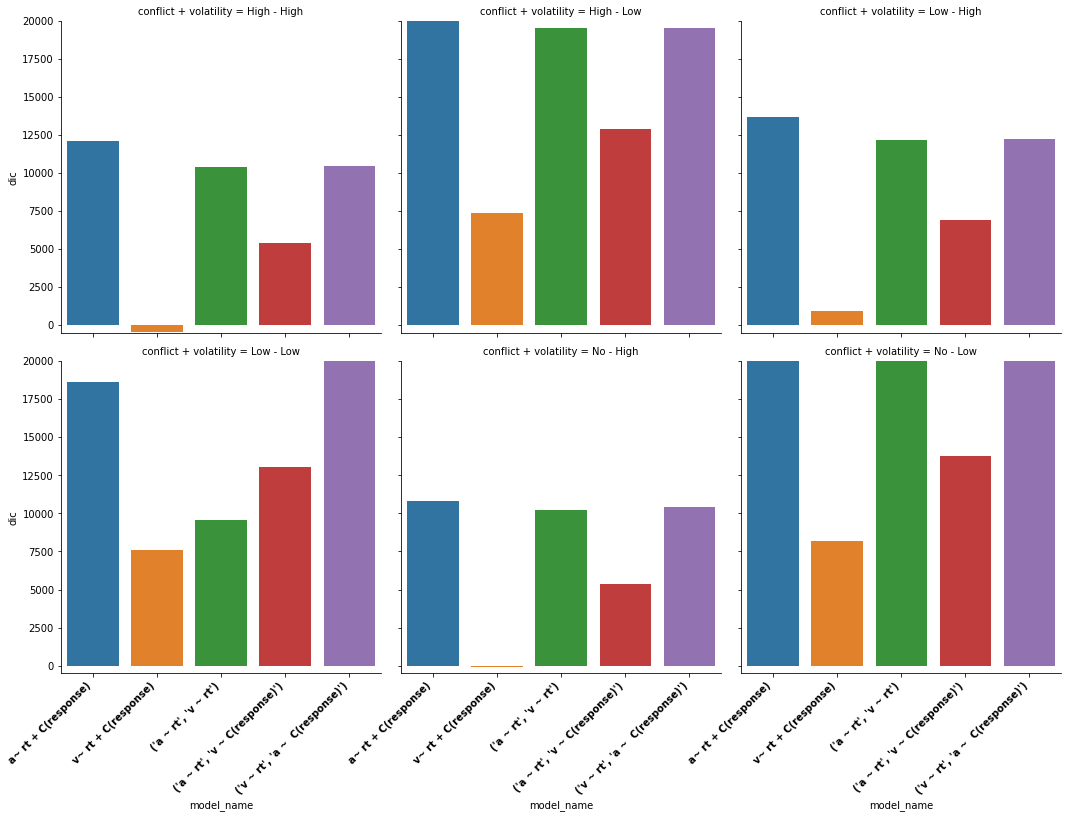

In [72]:
g1 = sns.catplot(x="model_name",y="dic",data=model_comparison,col="conflict + volatility",kind='bar',col_wrap=3)

for ax in g1.axes:
    xticklabels = [model_inputs[x.get_text()]   for x in ax.get_xticklabels()]
    print(xticklabels)
    ax.set_xticklabels(xticklabels,rotation=45,fontweight='bold',fontsize=10,ha='right')
    ax.set_ylim(-500,20000)
g1.savefig(figure_dir+"Model_comparison_dic.png")   

In [47]:
# hddm_data = grp[1].iloc[:100].copy()
# hddm_data["RT(ms)"] = hddm_data["RT(ms)"]/1000.
# hddm_data = hddm_data.rename(columns={'optimal_action':'response','RT(ms)':'rt'})
        
# m = hddm.HDDMRegressor(hddm_data,('v ~ rt','a ~rt',{'model':'z ~ C(response)','link_func': lambda x: x}),p_outlier=0.05,include='z')
# m.find_starting_values()
# m.sample(100,burn=10)

No model attribute --> setting up standard HDDM
Set model to ddm
Reg Model:
{'outcome': 'v', 'model': ' rt', 'params': ['v_Intercept', 'v_rt'], 'link_func': <function HDDMRegressor.__init__.<locals>.<lambda> at 0x7fbce7c46d30>}
Uses Identity Link
Reg Model:
{'outcome': 'a', 'model': 'rt', 'params': ['a_Intercept', 'a_rt'], 'link_func': <function HDDMRegressor.__init__.<locals>.<lambda> at 0x7fbce7c46c10>}
Uses Identity Link
Reg Model:
{'outcome': 'z', 'model': ' C(response)', 'params': ['z_Intercept', 'z_C(response)[T.1.0]'], 'link_func': <function <lambda> at 0x7fbce7c46dc0>}
Uses Identity Link
-49.45525966185132


AttributeError: Deterministic z_Intercept's value cannot be set.

In [15]:
hddm_data['rt'].min()

0.11

In [16]:
# m.find_starting_values()
# m.sample(10000, burn=1000,dbname='v_rt',db='pickle')


In [17]:
# hddm_data = generate_trialwise_estimates(hddm_data, m.get_traces())

In [18]:
# models = dict()
# model_dicts[grp[0]] = hddm_data.copy()
# models[grp[0]+"_model"] = m


In [50]:
pickle.dump(model_dicts,open(data_target_dir+"model_dict_DDM_vs_behavioral_features_a.pickle","wb"))


In [51]:
dill.dump(models,open(data_target_dir+"models_DDM_vs_behavioral_features.pickle_a.pickle","wb"))

In [23]:
model_dicts = pickle.load(open(data_target_dir+"model_dict_DDM_vs_behavioral_features_a.pickle","rb"))

In [24]:
model_dicts['High - High']

,Unnamed: 0,level_0,index,conflict,condition,volatility,event_marker,block,reward_probability,trial_length_range,...,chosen_action,rewarded,response,rt,conflict + volatility,v_est,v_est_jittered,slope(v_vs_rt),v_jittered_intercept0,v_jittered_intercept1
6013,6013,0,0,High,Control,High,8,left,25-75,10-20,...,right,unrewarded,0.0,0.299,High - High,-7.666196,-7.708899,-3.886055,NaN,NaN
6014,6014,1,1,High,Control,High,8,left,25-75,10-20,...,right,unrewarded,0.0,0.413,High - High,-8.109206,-8.173340,-3.886055,NaN,NaN
6015,6015,2,2,High,Control,High,8,left,25-75,10-20,...,right,unrewarded,0.0,0.942,High - High,-10.164929,-10.074255,-3.886055,NaN,NaN
6016,6016,3,3,High,Control,High,8,left,25-75,10-20,...,right,unrewarded,0.0,0.417,High - High,-8.124751,-8.106254,-3.886055,NaN,NaN
6017,6017,4,4,High,Control,High,1,left,25-75,10-20,...,left,rewarded,1.0,1.250,High - High,8.123571,8.066603,-3.886055,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11564,11564,5551,8341,High,Control,High,8,left,25-75,10-20,...,right,unrewarded,0.0,1.933,High - High,-14.016010,-13.869722,-3.886055,NaN,NaN
11565,11565,5552,8342,High,Control,High,8,left,25-75,10-20,...,right,unrewarded,0.0,0.450,High - High,-8.252990,-8.192402,-3.886055,NaN,NaN
11566,11566,5553,8343,High,Control,High,8,left,25-75,10-20,...,right,unrewarded,0.0,1.122,High - High,-10.864419,-10.851658,-3.886055,NaN,NaN
11567,11567,5554,8344,High,Control,High,8,left,25-75,10-20,...,right,unrewarded,0.0,0.504,High - High,-8.462837,-8.511654,-3.886055,NaN,NaN


In [52]:
all_rts_vs_drift = pd.DataFrame()

for k in model_dicts.keys():
    print(k)
    if "model" in k:
        continue
    df = model_dicts[k]
    all_rts_vs_drift = all_rts_vs_drift.append(df)
all_rts_vs_drift.to_csv(data_target_dir+"all_rts_vs_drift_a.csv")

In [53]:
df

NameError: name 'df' is not defined

/home/jyotika/.local/lib/python3.8/site-packages/seaborn/regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/home/jyotika/.local/lib/python3.8/site-packages/seaborn/regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


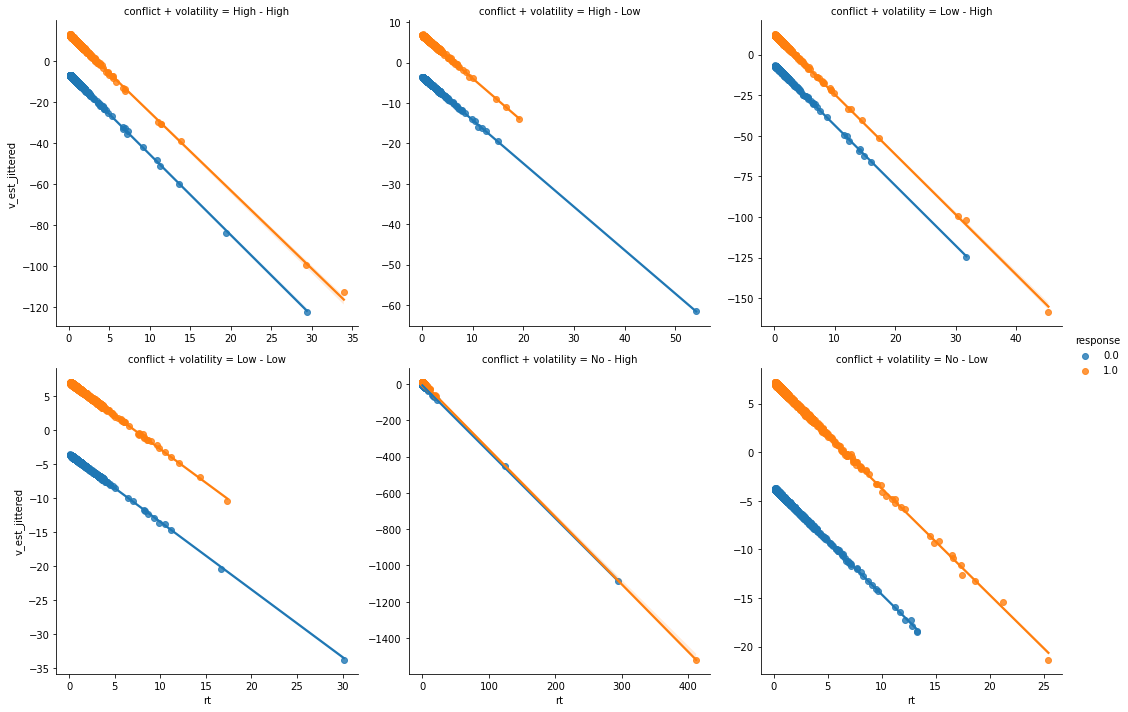

In [28]:
g1 = sns.lmplot(x="rt",y="v_est_jittered",data=all_rts_vs_drift,hue="response",col="conflict + volatility",col_wrap=3,sharey=False,sharex=False)
g1.savefig(figure_dir+"vest_jittered_vs_rt_all_a.png")

/home/jyotika/.local/lib/python3.8/site-packages/seaborn/regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/home/jyotika/.local/lib/python3.8/site-packages/seaborn/regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


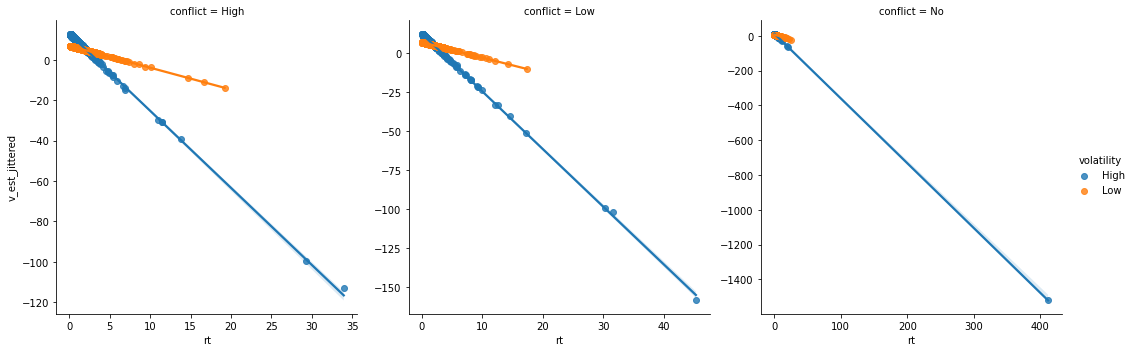

In [32]:
g2 = sns.lmplot(x="rt",y="v_est_jittered",data=all_rts_vs_drift.loc[all_rts_vs_drift["response"]==1.0],hue="volatility",col="conflict",col_wrap=3,sharex=False,sharey=False)
g2.savefig(figure_dir+"vest_jittered_vs_rt_optimal_actions_a.png")


/home/jyotika/.local/lib/python3.8/site-packages/seaborn/regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/home/jyotika/.local/lib/python3.8/site-packages/seaborn/regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


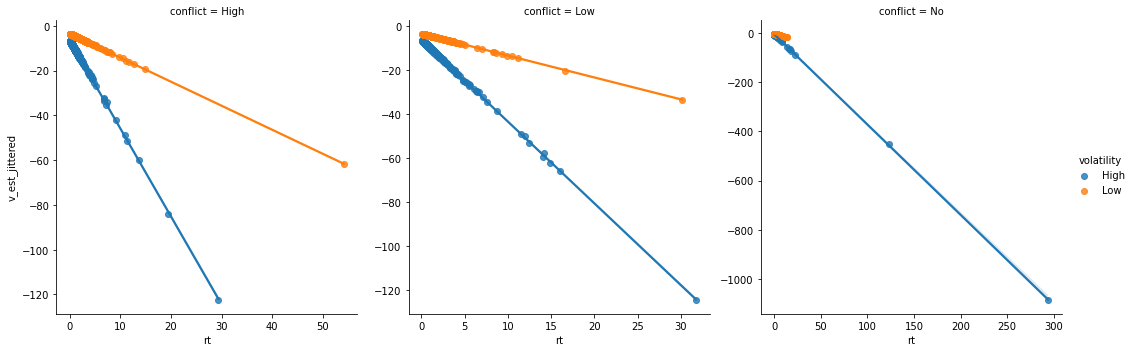

In [33]:
g2 = sns.lmplot(x="rt",y="v_est_jittered",data=all_rts_vs_drift.loc[all_rts_vs_drift["response"]==0.0],hue="volatility",col="conflict",col_wrap=3,sharex=False,sharey=False)
g2.savefig(figure_dir+"vest_jittered_vs_rt_sub_optimal_actions_a.png")


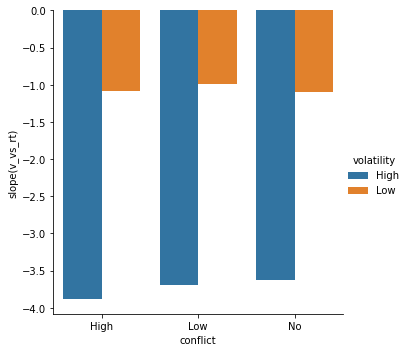

In [36]:
g3 = sns.catplot(x="conflict",y='slope(v_vs_rt)',data=all_rts_vs_drift,hue="volatility",kind='bar')
g3.savefig(figure_dir+"Slope_v_vs_rt_all_a.png")

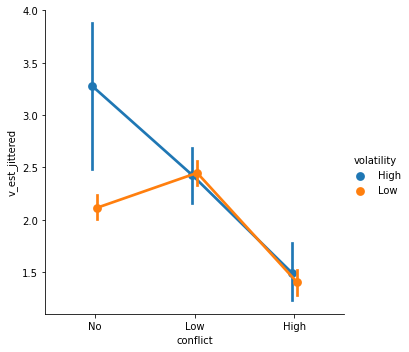

In [44]:
g3 = sns.catplot(x="conflict",y='v_est_jittered',data=all_rts_vs_drift,hue="volatility",kind='point',dodge=True,order=["No","Low","High"])
g3.savefig(figure_dir+"v_est_jittered_all_a.png")

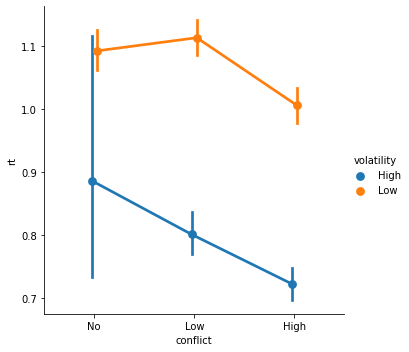

In [45]:
g4 = sns.catplot(x="conflict",y='rt',data=all_rts_vs_drift,hue="volatility",kind='point',dodge=True,order=["No","Low","High"])
g4.savefig(figure_dir+"reaction_times_all.png")